In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
train=pd.read_csv(r"C:\Users\KIIT\Desktop\Hackathon\train.csv")
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [3]:
train.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [4]:
train.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [5]:
train.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [6]:
train['Employee ID'].value_counts()

fffe32003600360036003800    1
fffe3400330031003800        1
fffe3100300030003800        1
fffe31003200380039003200    1
fffe32003100340038003700    1
                           ..
fffe31003100390031003500    1
fffe32003300350039003400    1
fffe320039003000            1
fffe31003100310039003700    1
fffe32003200320032003600    1
Name: Employee ID, Length: 22750, dtype: int64

In [7]:
train['Resource Allocation'].value_counts()

4.0     3893
5.0     3861
3.0     3192
6.0     2943
2.0     2075
7.0     1965
1.0     1791
8.0     1044
9.0      446
10.0     159
Name: Resource Allocation, dtype: int64

In [8]:
train['Resource Allocation'].fillna(train['Resource Allocation'].mean(), inplace=True)

In [9]:
train['Mental Fatigue Score'].value_counts()

6.0    470
5.8    464
5.9    458
6.1    457
6.3    454
      ... 
0.5     24
0.2     23
0.4     19
0.1     17
0.3     13
Name: Mental Fatigue Score, Length: 101, dtype: int64

In [10]:
train['Mental Fatigue Score'].fillna(train['Mental Fatigue Score'].mean(), inplace=True)

In [11]:
train['Burn Rate'].value_counts()

0.47    475
0.43    444
0.41    434
0.45    431
0.50    428
       ... 
0.98     18
0.97     17
0.95     17
0.96     13
0.99      8
Name: Burn Rate, Length: 101, dtype: int64

In [12]:
train['Burn Rate'].fillna(train['Burn Rate'].mean(), inplace=True)

In [13]:
train.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

# Data Visualization

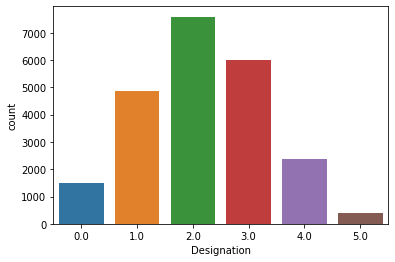

In [14]:
ax = sns.countplot(x="Designation", data=train)

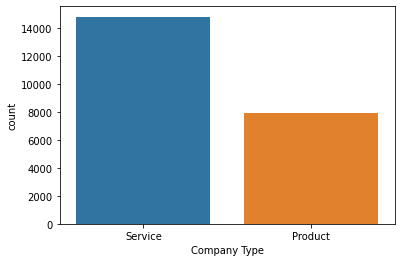

In [15]:
ax = sns.countplot(x="Company Type", data=train)

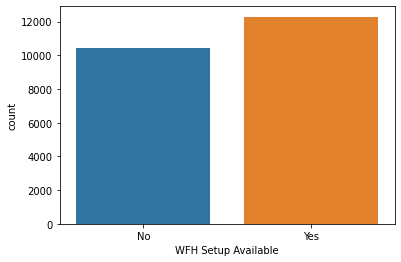

In [16]:
ax = sns.countplot(x="WFH Setup Available", data=train)

<AxesSubplot:xlabel='Designation', ylabel='Mental Fatigue Score'>

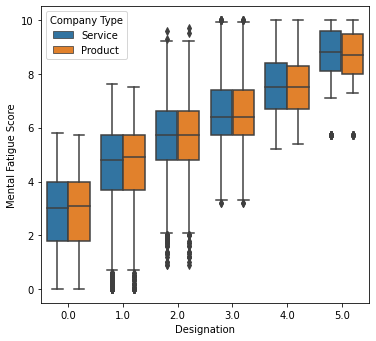

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Designation', y = 'Mental Fatigue Score',hue='Company Type',data = train)

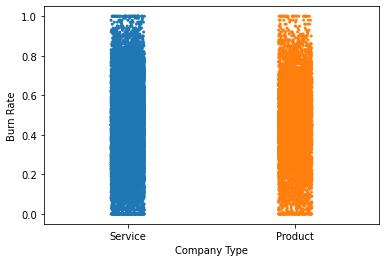

<Figure size 720x360 with 0 Axes>

In [18]:
sns.stripplot(x = "Company Type", y = "Burn Rate",data = train,size=3)
plt.figure(figsize=(10,5))
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Burn Rate'>

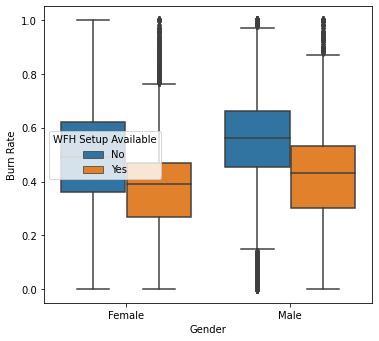

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Gender', y = 'Burn Rate',hue='WFH Setup Available',data = train)

# Feature Engineering

In [20]:
one_hot = pd.get_dummies(train['Gender'])
train = train.drop('Gender',axis = 1)
train =train.join(one_hot)

In [21]:
one_hot = pd.get_dummies(train['Company Type'])
train = train.drop('Company Type',axis = 1)
train =train.join(one_hot)

In [22]:
one_hot = pd.get_dummies(train['WFH Setup Available'])
train = train.drop('WFH Setup Available',axis = 1)
train =train.join(one_hot)

In [23]:
train.head()

,Employee ID,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Female,Male,Product,Service,No,Yes
0,fffe32003000360033003200,2008-09-30,2.0,3.000000,3.8,0.16,1,0,0,1,1,0
1,fffe3700360033003500,2008-11-30,1.0,2.000000,5.0,0.36,0,1,0,1,0,1
2,fffe31003300320037003900,2008-03-10,2.0,4.481398,5.8,0.49,1,0,1,0,0,1
3,fffe32003400380032003900,2008-11-03,1.0,1.000000,2.6,0.20,0,1,0,1,0,1
4,fffe31003900340031003600,2008-07-24,3.0,7.000000,6.9,0.52,1,0,0,1,1,0


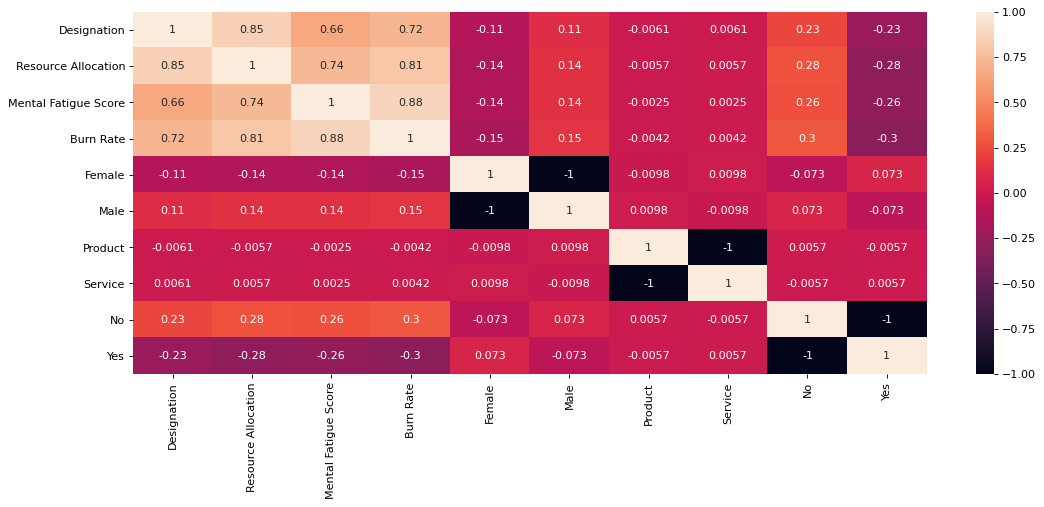

In [24]:
cor=(train.corr())
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(cor, annot=True)
plt.show()

The variable 'Resource Allocation' is having high correlation with other independent variables(Designation,Resource Allocation	Mental Fatigue Score) so we will drop the column

In [25]:
train=train.drop(['Resource Allocation'], axis = 1)

Checking unique values of Employee ID


In [26]:
train['Employee ID'].value_counts()

fffe32003600360036003800    1
fffe3400330031003800        1
fffe3100300030003800        1
fffe31003200380039003200    1
fffe32003100340038003700    1
                           ..
fffe31003100390031003500    1
fffe32003300350039003400    1
fffe320039003000            1
fffe31003100310039003700    1
fffe32003200320032003600    1
Name: Employee ID, Length: 22750, dtype: int64

Since Employee ID acts a key(unique value) setting Employee ID as index

In [27]:
train.set_index('Employee ID',inplace=True)

In [28]:
train.head()

,Date of Joining,Designation,Mental Fatigue Score,Burn Rate,Female,Male,Product,Service,No,Yes
Employee ID,,,,,,,,,,
fffe32003000360033003200,2008-09-30,2.0,3.8,0.16,1,0,0,1,1,0
fffe3700360033003500,2008-11-30,1.0,5.0,0.36,0,1,0,1,0,1
fffe31003300320037003900,2008-03-10,2.0,5.8,0.49,1,0,1,0,0,1
fffe32003400380032003900,2008-11-03,1.0,2.6,0.20,0,1,0,1,0,1
fffe31003900340031003600,2008-07-24,3.0,6.9,0.52,1,0,0,1,1,0


In [29]:
train['Date of Joining'].value_counts()

2008-01-06    86
2008-05-21    85
2008-02-04    82
2008-07-16    81
2008-01-29    80
              ..
2008-06-27    44
2008-07-06    44
2008-12-24    43
2008-07-04    43
2008-12-07    39
Name: Date of Joining, Length: 366, dtype: int64

In [30]:
#Performing target encoding on Date of Joining attribute
import datetime
train['Date of Joining']= pd.to_datetime(train['Date of Joining'])
train['day'] = train['Date of Joining'].dt.day
train['month'] = train['Date of Joining'].dt.month
train['year'] = train['Date of Joining'].dt.year
train_date_due=train['Date of Joining']
train = train.drop('Date of Joining' , axis = 'columns')

In [31]:
train.head()

,Designation,Mental Fatigue Score,Burn Rate,Female,Male,Product,Service,No,Yes,day,month,year
Employee ID,,,,,,,,,,,,
fffe32003000360033003200,2.0,3.8,0.16,1,0,0,1,1,0,30,9,2008
fffe3700360033003500,1.0,5.0,0.36,0,1,0,1,0,1,30,11,2008
fffe31003300320037003900,2.0,5.8,0.49,1,0,1,0,0,1,10,3,2008
fffe32003400380032003900,1.0,2.6,0.20,0,1,0,1,0,1,3,11,2008
fffe31003900340031003600,3.0,6.9,0.52,1,0,0,1,1,0,24,7,2008


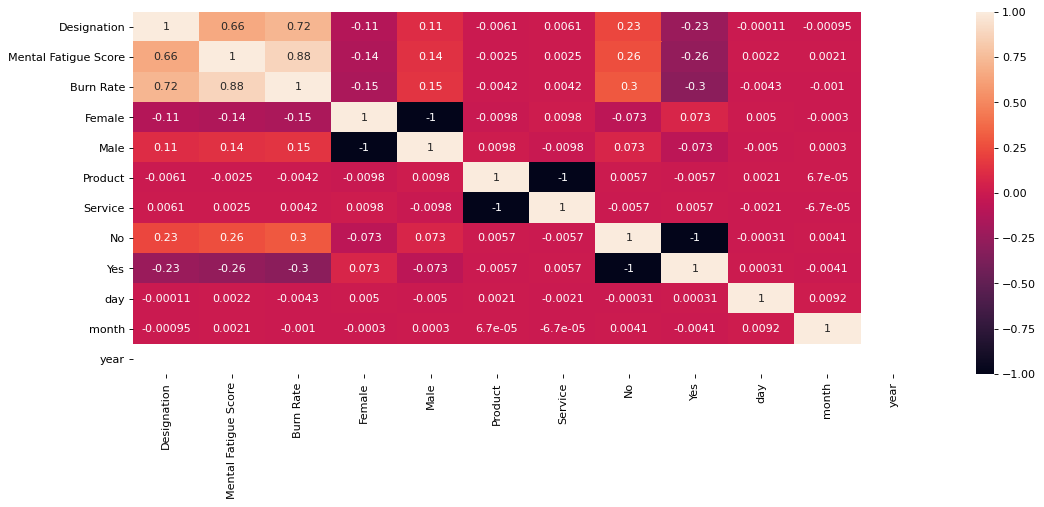

In [32]:
cor=(train.corr())
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(cor, annot=True)
plt.show()

The columns Designation and Mental Fatigue Score are linearly related to the Burn Rate

In [33]:
X=train.drop(['Burn Rate'], axis = 1)
y=train['Burn Rate']
X.head()

,Designation,Mental Fatigue Score,Female,Male,Product,Service,No,Yes,day,month,year
Employee ID,,,,,,,,,,,
fffe32003000360033003200,2.0,3.8,1,0,0,1,1,0,30,9,2008
fffe3700360033003500,1.0,5.0,0,1,0,1,0,1,30,11,2008
fffe31003300320037003900,2.0,5.8,1,0,1,0,0,1,10,3,2008
fffe32003400380032003900,1.0,2.6,0,1,0,1,0,1,3,11,2008
fffe31003900340031003600,3.0,6.9,1,0,0,1,1,0,24,7,2008


In [34]:
y.head()

Employee ID
fffe32003000360033003200    0.16
fffe3700360033003500        0.36
fffe31003300320037003900    0.49
fffe32003400380032003900    0.20
fffe31003900340031003600    0.52
Name: Burn Rate, dtype: float64

# Using Linear Regression (OLS) method

In [35]:
import statsmodels.api as sm

In [36]:
X_d = sm.add_constant(X)
result = sm.OLS(y, X_d).fit()

In [37]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Burn Rate   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                 1.391e+04
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:54:59   Log-Likelihood:                 24043.
No. Observations:               22750   AIC:                        -4.807e+04
Df Residuals:                   22742   BIC:                        -4.801e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Designation              0.0416      0.001     63.665      0.000       0.040       0.043
Mental Fatigue Score     0.0739      0.000    180.232      0.000       0.073       0.075
Female                  -0.0043      0.001     -7.564      0.000      -0.005      -0.003
Male                     0.0043      0.001      7.564      0.000       0.003       0.005
Product                 -0.0003      0.001     -0.498      0.619      -0.001       0.001
Service                  0.0003      0.001      0.498      0.619      -0.001       0.001
No                       0.0110      0.001     18.817      0.000       0.010       0.012
Yes                     -0.0110      0.001    -18.817      0.000      -0.012      -0.010
day                     -0.0001   6.36e-05     -1.952      0.051      -0.000    5.31e-07
month                   -0.0001      0.000     -0.847      0.397      -0.000       0.000
year                 -2.906e-05    1.2e-06    -24.205      0.000   -3.14e-05   -2.67e-05
==============================================================================
Omnibus:                     2221.171   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15965.012
Skew:                           0.161   Prob(JB):                         0.00
Kurtosis:                       7.091   Cond. No.                     4.00e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.75e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

As we can see the P values of Product and Service are extremely high sighting their insignificance we will drop the 2 attributes

In [38]:
X=X.drop(['Product','Service'], axis = 1)
X.head()

,Designation,Mental Fatigue Score,Female,Male,No,Yes,day,month,year
Employee ID,,,,,,,,,
fffe32003000360033003200,2.0,3.8,1,0,1,0,30,9,2008
fffe3700360033003500,1.0,5.0,0,1,0,1,30,11,2008
fffe31003300320037003900,2.0,5.8,1,0,0,1,10,3,2008
fffe32003400380032003900,1.0,2.6,0,1,0,1,3,11,2008
fffe31003900340031003600,3.0,6.9,1,0,1,0,24,7,2008


In [39]:
X_d = sm.add_constant(X)
result = sm.OLS(y, X_d).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Burn Rate   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                 1.623e+04
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:55:00   Log-Likelihood:                 24043.
No. Observations:               22750   AIC:                        -4.807e+04
Df Residuals:                   22743   BIC:                        -4.802e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Designation              0.0416      0.001     63.671      0.000       0.040       0.043
Mental Fatigue Score     0.0739      0.000    180.235      0.000       0.073       0.075
Female                  -0.0043      0.001     -7.559      0.000      -0.005      -0.003
Male                     0.0043      0.001      7.559      0.000       0.003       0.005
No                       0.0110      0.001     18.814      0.000       0.010       0.012
Yes                     -0.0110      0.001    -18.814      0.000      -0.012      -0.010
day                     -0.0001   6.36e-05     -1.953      0.051      -0.000     4.6e-07
month                   -0.0001      0.000     -0.847      0.397      -0.000       0.000
year                 -2.902e-05    1.2e-06    -24.230      0.000   -3.14e-05   -2.67e-05
==============================================================================
Omnibus:                     2221.196   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15969.244
Skew:                           0.161   Prob(JB):                         0.00
Kurtosis:                       7.092   Cond. No.                     2.83e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

As we can see the P values of month are extremely high sighting their insignificance we will drop the attribute.

In [40]:
X=X.drop(['month'], axis = 1)

In [41]:
X.head()

,Designation,Mental Fatigue Score,Female,Male,No,Yes,day,year
Employee ID,,,,,,,,
fffe32003000360033003200,2.0,3.8,1,0,1,0,30,2008
fffe3700360033003500,1.0,5.0,0,1,0,1,30,2008
fffe31003300320037003900,2.0,5.8,1,0,0,1,10,2008
fffe32003400380032003900,1.0,2.6,0,1,0,1,3,2008
fffe31003900340031003600,3.0,6.9,1,0,1,0,24,2008


In [42]:
y.head()

Employee ID
fffe32003000360033003200    0.16
fffe3700360033003500        0.36
fffe31003300320037003900    0.49
fffe32003400380032003900    0.20
fffe31003900340031003600    0.52
Name: Burn Rate, dtype: float64

# Training model with XgbRegressor

In [43]:
from xgboost import XGBRegressor
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X,y)
y_pred=model.predict(X)

In [44]:
import math
from sklearn.metrics import mean_squared_error
val_1_error = mean_squared_error(y, y_pred)
print("RMSE : ", math.sqrt(val_1_error))

RMSE :  0.05754962105269243


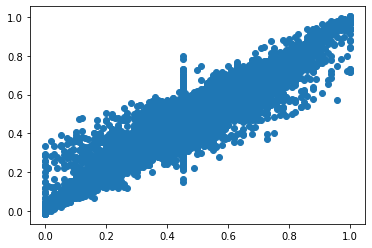

In [45]:
plt.scatter(y, y_pred)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Burn Rate', ylabel='Density'>

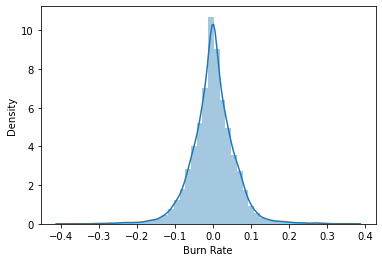

In [46]:
sns.distplot(y_pred-y)

# Hyperparameter Tuning using RandomSearchCV

In [47]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [48]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]


In [49]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [50]:
# # Set up the random search with 4-fold cross validation
# random_cv = RandomizedSearchCV(estimator=model,
#             param_distributions=hyperparameter_grid,
#             cv=5, n_iter=50,
#             scoring = 'neg_mean_absolute_error',n_jobs = 4,
#             verbose = 5, 
#             return_train_score = True,
#             random_state=42)

In [51]:
# random_cv.fit(X,y)

In [52]:

# random_cv.best_estimator_

In [53]:
model=XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=4,  monotone_constraints='()',
             n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
model.fit(X,y)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Test Set

In [55]:
test=pd.read_csv(r"C:\Users\KIIT\Desktop\Hackathon\test.csv")
test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [56]:

test['Mental Fatigue Score'].fillna(test['Mental Fatigue Score'].mean(), inplace=True)
test['Resource Allocation'].fillna(test['Resource Allocation'].mean(), inplace=True)
test=test.drop(['Resource Allocation'], axis = 1)
test.set_index('Employee ID',inplace=True)

In [57]:
one_hot = pd.get_dummies(test['Gender'])
test = test.drop('Gender',axis = 1)
test =test.join(one_hot)
one_hot = pd.get_dummies(test['Company Type'])
test = test.drop('Company Type',axis = 1)
test =test.join(one_hot)
one_hot = pd.get_dummies(test['WFH Setup Available'])
test = test.drop('WFH Setup Available',axis = 1)
test =test.join(one_hot)
test=test.drop(['Product','Service'], axis = 1)

In [58]:
test['Date of Joining']= pd.to_datetime(test['Date of Joining'])
test['day'] = test['Date of Joining'].dt.day
test['month'] = test['Date of Joining'].dt.month
test['year'] = test['Date of Joining'].dt.year
test_date=test['Date of Joining']
test= test.drop('Date of Joining' , axis = 'columns')
test=test.drop(['month'], axis = 1)

In [59]:
test.head()

,Designation,Mental Fatigue Score,Female,Male,No,Yes,day,year
Employee ID,,,,,,,,
fffe31003300390039003000,2.0,7.7,1,0,1,0,10,2008
fffe31003300310037003800,1.0,5.2,1,0,0,1,14,2008
fffe33003400380035003900,1.0,5.9,0,1,0,1,13,2008
fffe3100370039003200,3.0,4.6,1,0,1,0,7,2008
fffe32003600390036003700,2.0,6.4,1,0,1,0,17,2008


In [60]:
y_pred=model.predict(test)
y_pred

array([0.60777617, 0.36183834, 0.4035395 , ..., 0.84624654, 0.5682604 ,
       0.14208639], dtype=float32)

In [62]:
import pickle
# open a file, where you ant to store the data
file = open('xgb_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

In [64]:
model = open('xgb_regression_model.pkl','rb')
